In [1]:
from sklearn.datasets import load_iris


iris = load_iris()

print(iris.keys())
print(iris.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1

In [2]:
import pandas as pd

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(iris_df.head())


iris_target = pd.DataFrame(data=[iris.target_names[x] for x in iris.target])
print(iris_target.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
        0
0  setosa
1  setosa
2  setosa
3  setosa
4  setosa


In [3]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(iris_df)

PCA()

In [4]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(iris_df, iris_target, test_size=0.3)

print(iris_df.shape)
print(x_train.shape)
print(x_test.shape)

(150, 4)
(105, 4)
(45, 4)


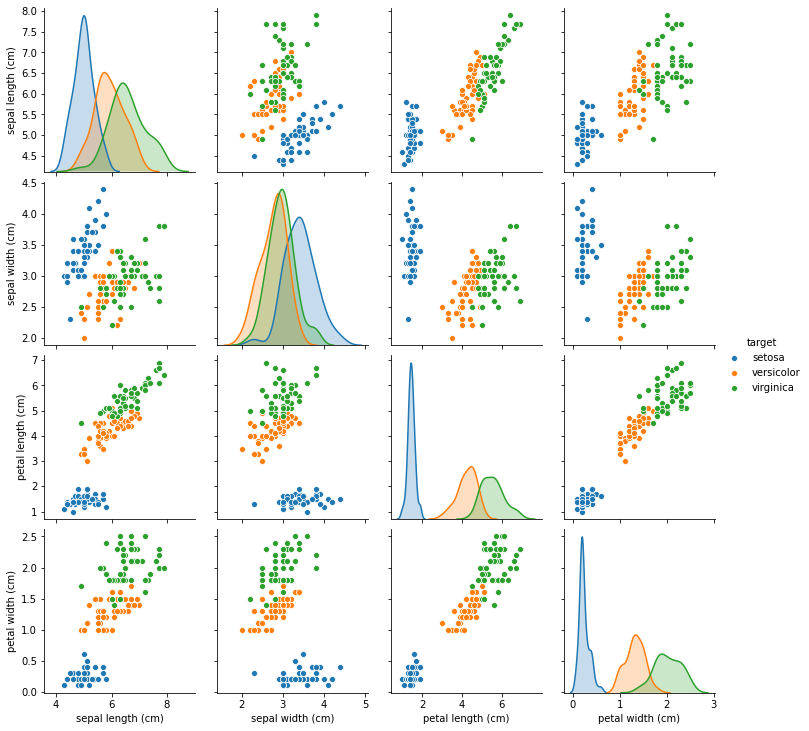

In [5]:
import seaborn as sns

%matplotlib inline

iris_df['target'] = iris_target

sns.pairplot(iris_df, hue='target')

In [6]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=1)

In [7]:
knn.score(x_test, y_test)

1.0

In [8]:
from sklearn.metrics import confusion_matrix


df = pd.DataFrame(confusion_matrix(y_test,knn.predict(x_test).reshape(-1, 1)))
df = df.rename(columns=dict(zip(df.columns, ['(pre) ' + name for name in iris.target_names])), index=dict(zip(df.columns, iris.target_names)))
df

,(pre) setosa,(pre) versicolor,(pre) virginica
setosa,14,0,0
versicolor,0,13,0
virginica,0,0,18
